<a href="https://colab.research.google.com/github/oniviev/ml-intro-project-Nivievskyi/blob/main/Ch_2_Ex_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10 in the Chapter 2
10. This exercise involves the Boston housing data set  
(a) To begin, load in the Boston data set, which is part of the ISLP
library  
(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?  
(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your fndings  
(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship  
(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor  
(f) How many of the suburbs in this data set bound the Charles
river?  
(g) What is the median pupil-teacher ratio among the towns in this
data set?  
(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors  
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your fndings   
(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

# (a) To begin, load in the Boston data set, which is part of the ISLP library

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from islp import load_data



In [9]:
# Load the dataset
boston = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ISLP_labs-2.1.3/data/Boston.csv')
boston
#boston = load_data('Boston')


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,4.98,24.00
1,2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,9.14,21.60
2,3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,4.03,34.70
3,4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,2.94,33.40
4,5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,9.67,22.40
502,503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,9.08,20.60
503,504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,5.64,23.90
504,505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,6.48,22.00


In [10]:
boston = boston.dropna()  # Clean NA if present
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,4.98,24.00
1,2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,9.14,21.60
2,3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,4.03,34.70
3,4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,2.94,33.40
4,5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,5.33,36.20


# Boston Data description
A data set containing housing values in 506 suburbs of Boston.

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

# (b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [11]:
rows, cols = boston.shape
print(f"The Boston dataset has {rows} rows and {cols} columns.")


The Boston dataset has 506 rows and 14 columns.


In [12]:
boston.shape

(506, 14)

# (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your fndings

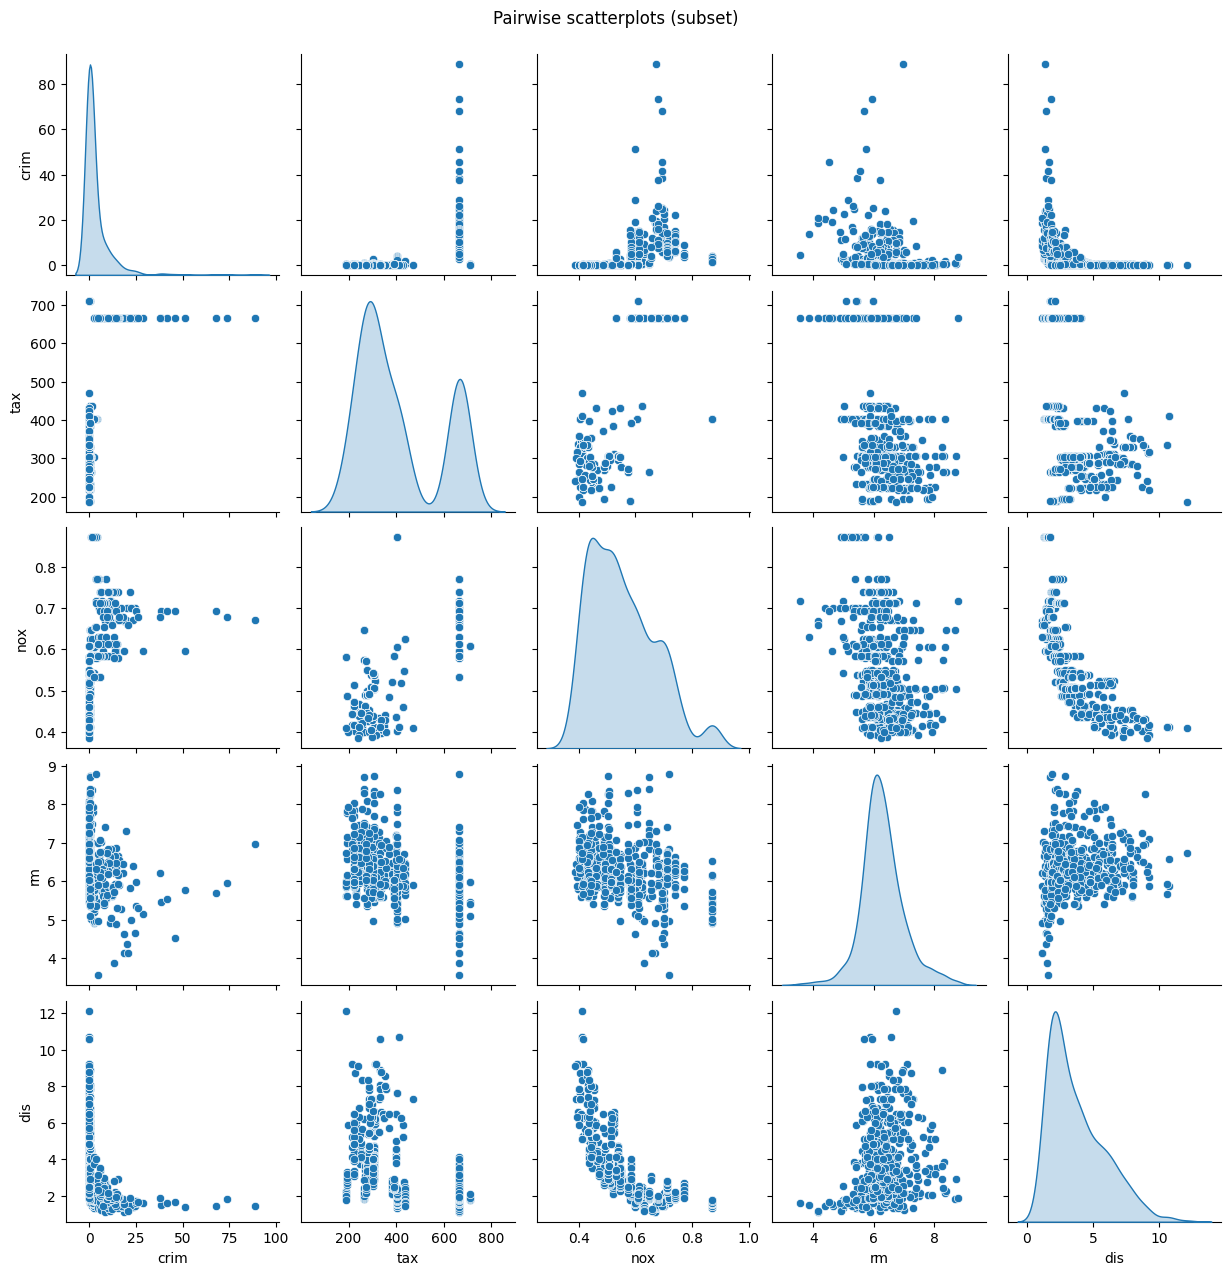

In [13]:
sns.pairplot(boston[['crim', 'tax', 'nox', 'rm', 'dis']], diag_kind='kde')
plt.suptitle("Pairwise scatterplots (subset)", y=1.02)
plt.show()

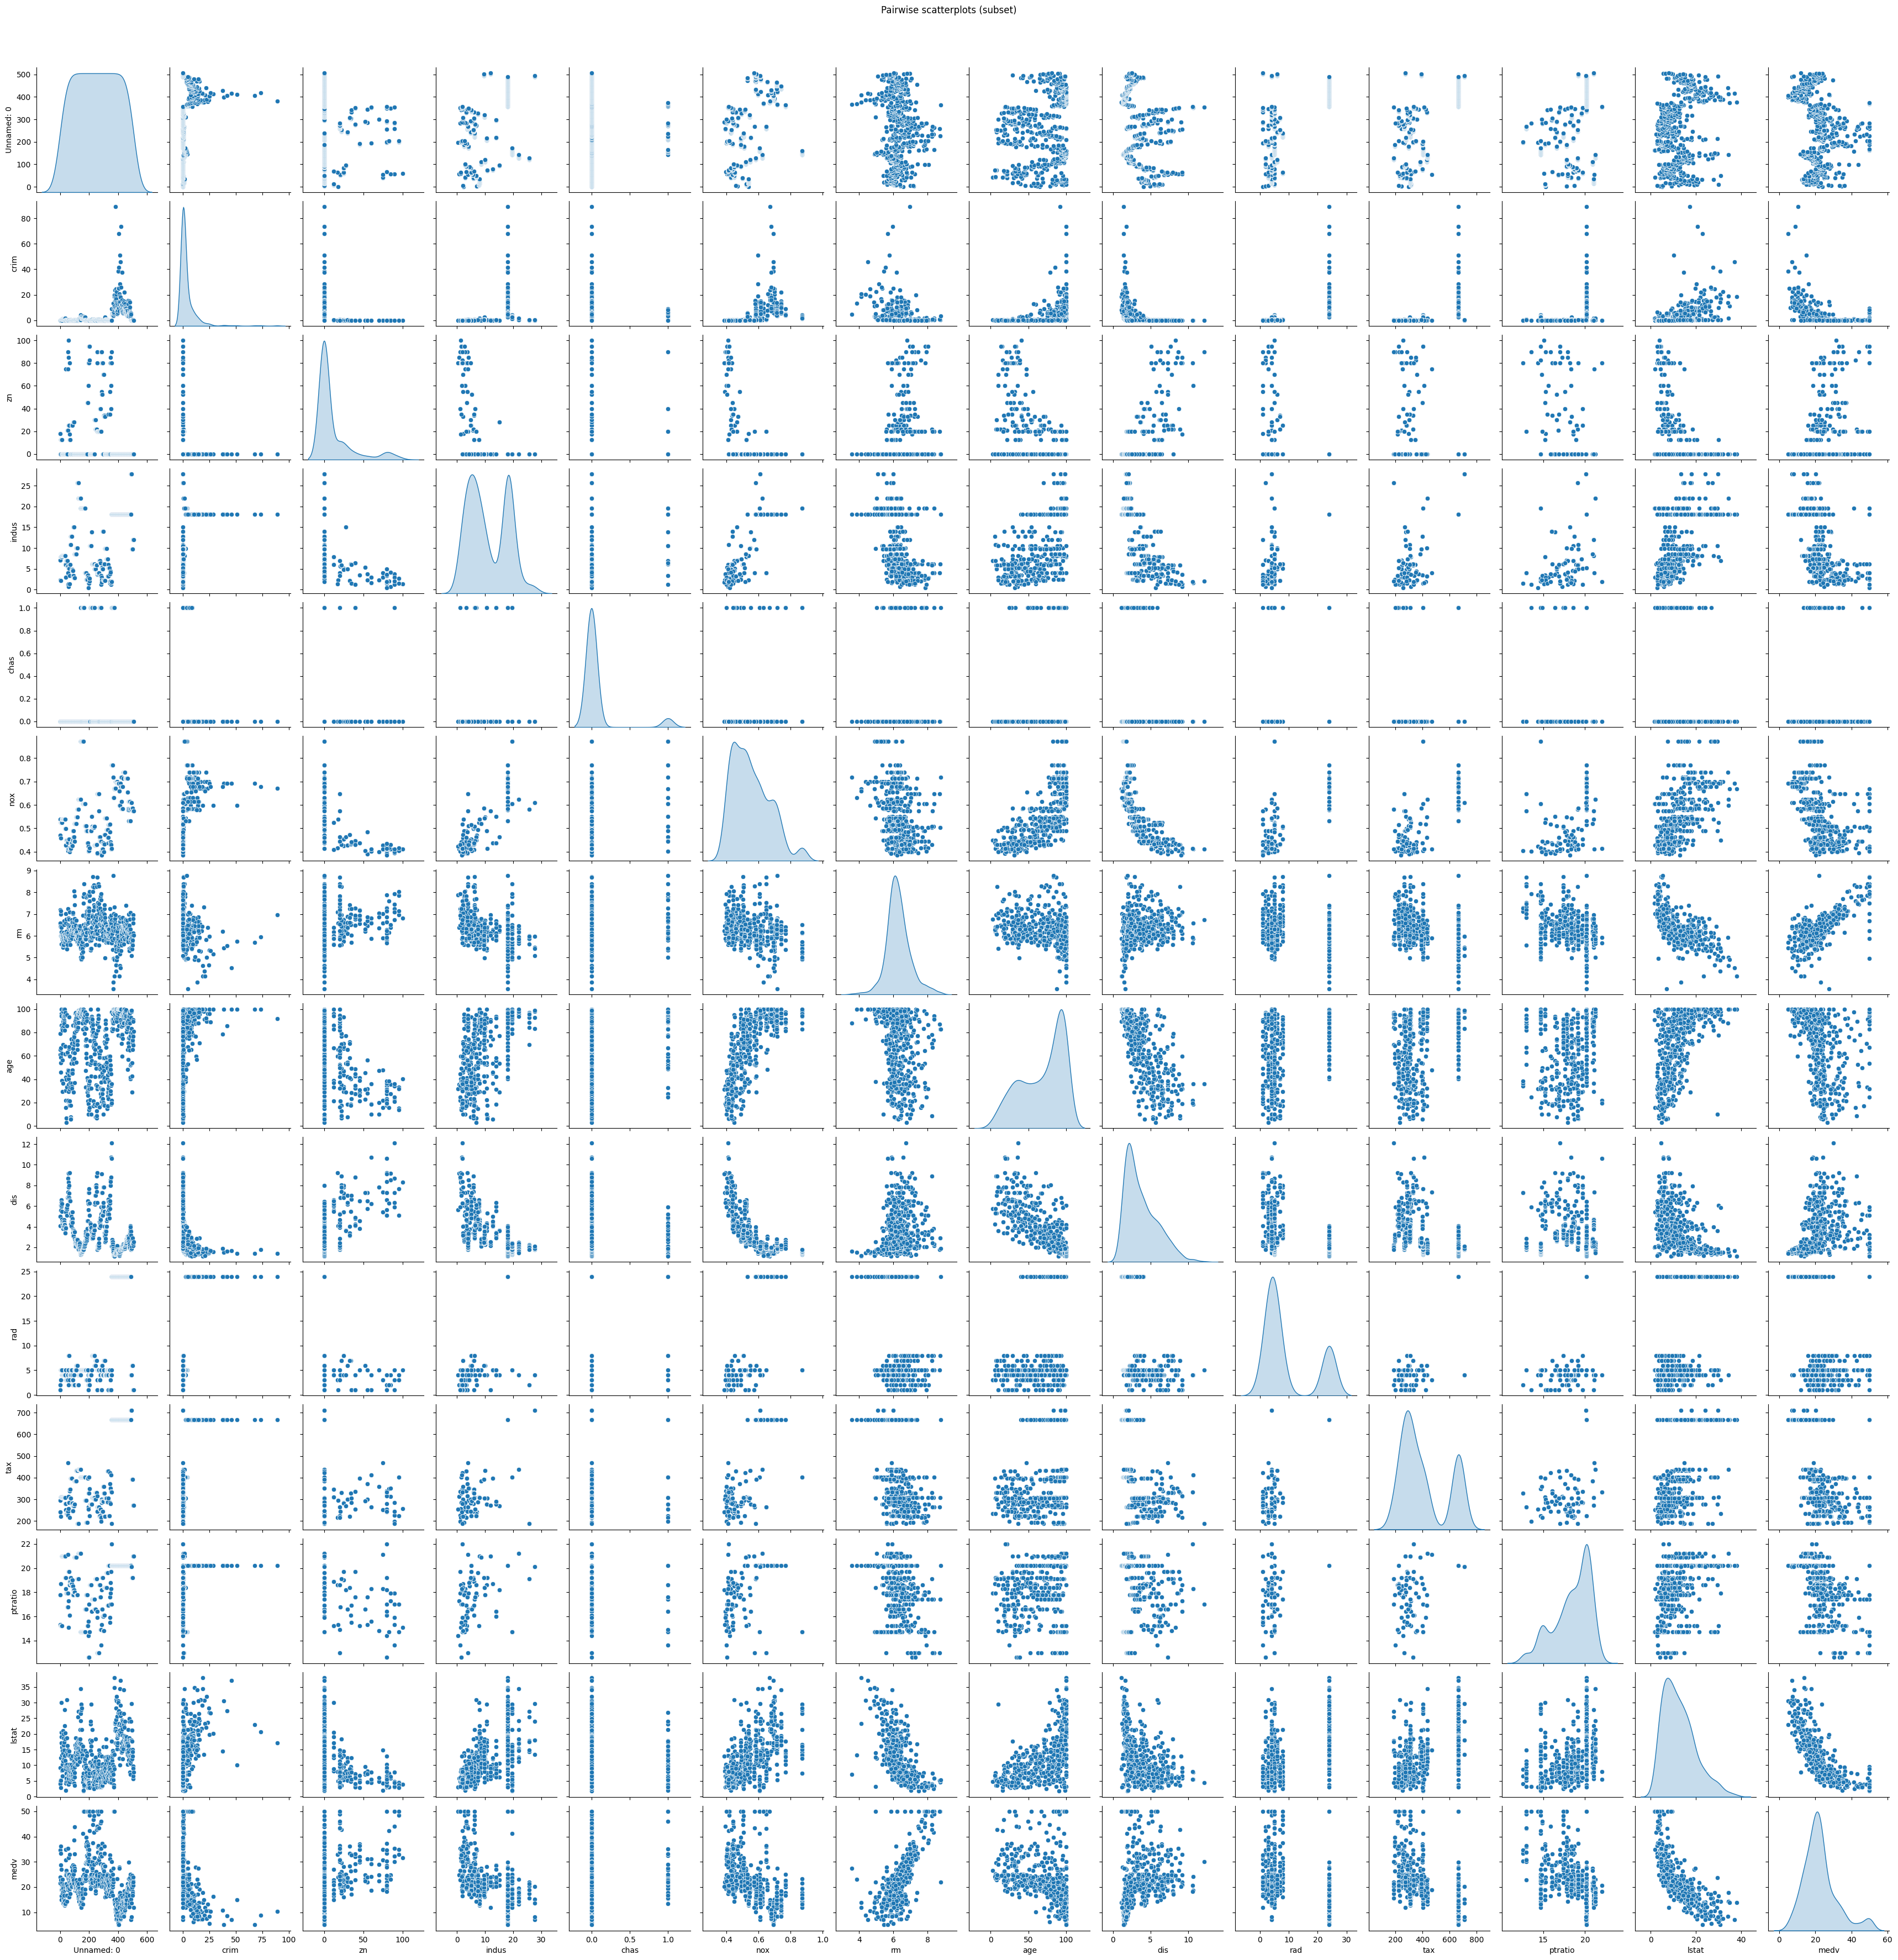

In [24]:
sns.pairplot(boston, diag_kind='kde')
plt.suptitle("Pairwise scatterplots (whole set)", y=1.02)
plt.show()

# (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

In [15]:
correlations = boston.corr()['crim'].sort_values(ascending=False)
print(correlations)

crim          1.00
rad           0.63
tax           0.58
lstat         0.46
nox           0.42
Unnamed: 0    0.41
indus         0.41
age           0.35
ptratio       0.29
chas         -0.06
zn           -0.20
rm           -0.22
dis          -0.38
medv         -0.39
Name: crim, dtype: float64


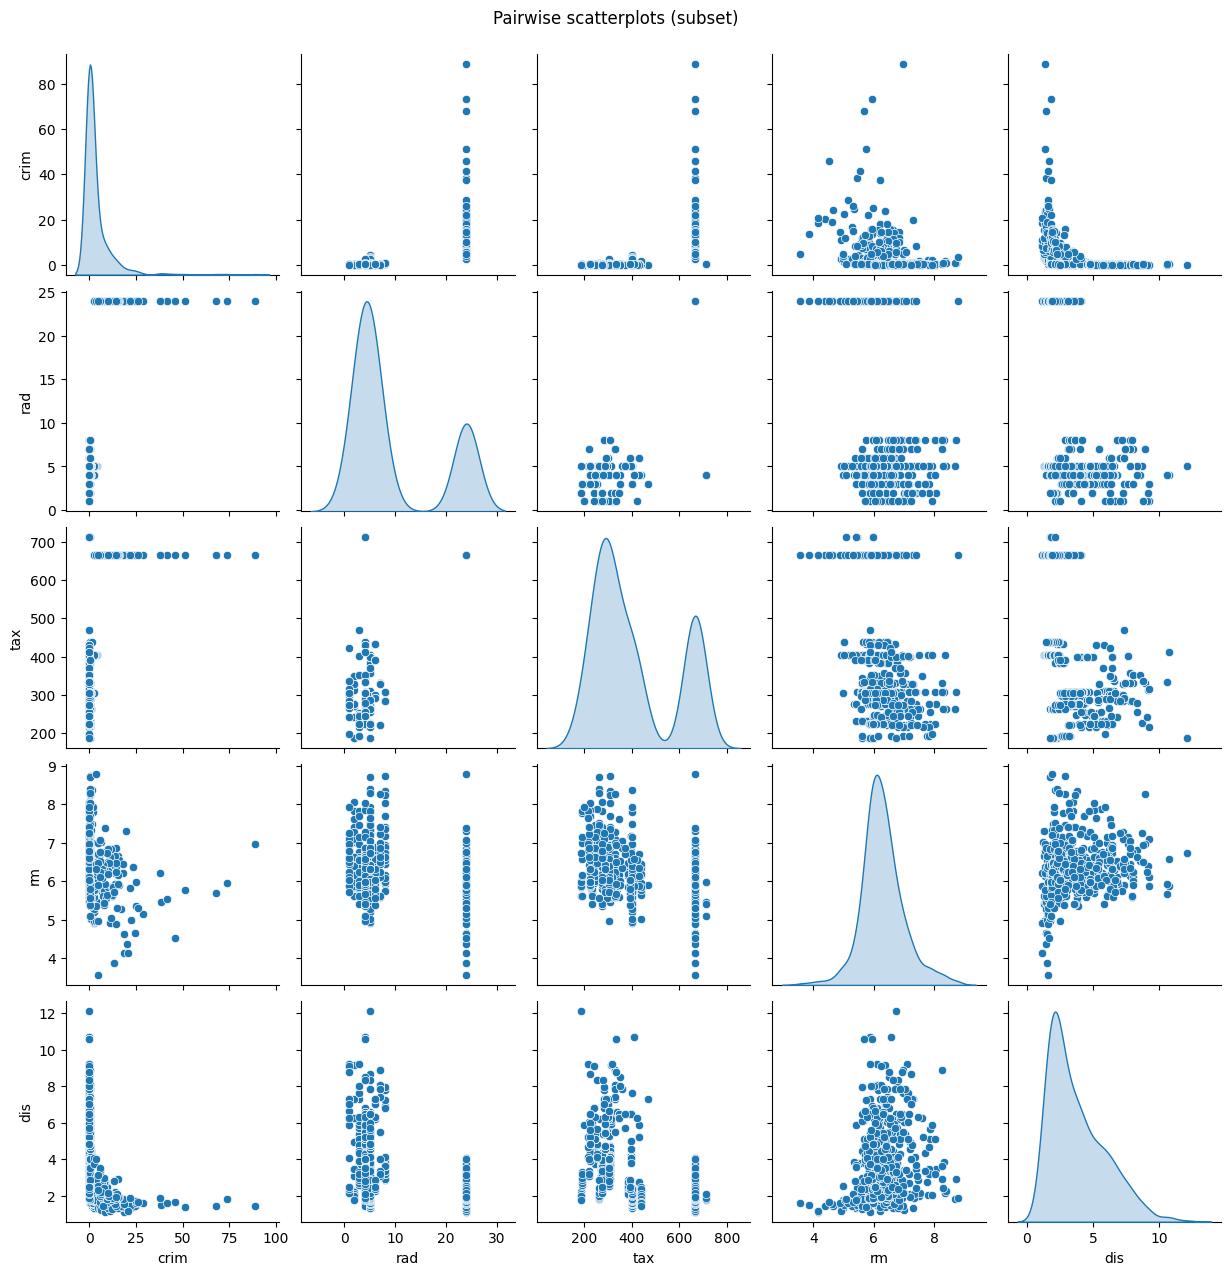

In [25]:
sns.pairplot(boston[['crim', 'rad', 'tax', 'rm', 'dis']], diag_kind='kde')
plt.suptitle("Pairwise scatterplots (subset)", y=1.02)
plt.show()

# (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

In [17]:
print("Highest crime rate suburb:\n", boston.loc[boston['crim'].idxmax()])
print("\nHighest tax rate:\n", boston.loc[boston['tax'].idxmax()])
print("\nHighest pupil-teacher ratio:\n", boston.loc[boston['ptratio'].idxmax()])

Highest crime rate suburb:
 Unnamed: 0   381.00
crim          88.98
zn             0.00
indus         18.10
chas           0.00
nox            0.67
rm             6.97
age           91.90
dis            1.42
rad           24.00
tax          666.00
ptratio       20.20
lstat         17.21
medv          10.40
Name: 380, dtype: float64

Highest tax rate:
 Unnamed: 0   489.00
crim           0.15
zn             0.00
indus         27.74
chas           0.00
nox            0.61
rm             5.45
age           92.70
dis            1.82
rad            4.00
tax          711.00
ptratio       20.10
lstat         18.06
medv          15.20
Name: 488, dtype: float64

Highest pupil-teacher ratio:
 Unnamed: 0   355.00
crim           0.04
zn            80.00
indus          1.91
chas           0.00
nox            0.41
rm             5.66
age           21.90
dis           10.59
rad            4.00
tax          334.00
ptratio       22.00
lstat          8.05
medv          18.20
Name: 354, dtype: float64


In [34]:
boston.loc[boston['crim'].nlargest(5).index]


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,381,88.98,0.00,18.10,0,0.67,6.97,91.90,1.42,24,666,20.20,17.21,10.40
418,419,73.53,0.00,18.10,0,0.68,5.96,100.00,1.80,24,666,20.20,20.62,8.80
405,406,67.92,0.00,18.10,0,0.69,5.68,100.00,1.43,24,666,20.20,22.98,5.00
410,411,51.14,0.00,18.10,0,0.60,5.76,100.00,1.41,24,666,20.20,10.11,15.00
414,415,45.75,0.00,18.10,0,0.69,4.52,100.00,1.66,24,666,20.20,36.98,7.00


In [18]:
boston[['crim', 'tax', 'ptratio']].agg(['min', 'max'])

,crim,tax,ptratio
min,0.01,187,12.60
max,88.98,711,22.00


from matplotlib import pyplot as plt
_df_0['crim'].plot(kind='hist', bins=20, title='crim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tax'].plot(kind='hist', bins=20, title='tax')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ptratio'].plot(kind='hist', bins=20, title='ptratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='crim', y='tax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='tax', y='ptratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['crim']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'crim'}, axis=1)
              .sort_values('crim', ascending=True))
  xs = counted['crim']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('crim', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('crim')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tax']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tax'}, axis=1)
              .sort_values('tax', ascending=True))
  xs = counted['tax']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('tax', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tax')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ptratio']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ptratio'}, axis=1)
              .sort_values('ptratio', ascending=True))
  xs = counted['ptratio']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ptratio', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ptratio')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['crim'].plot(kind='line', figsize=(8, 4), title='crim')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['tax'].plot(kind='line', figsize=(8, 4), title='tax')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ptratio'].plot(kind='line', figsize=(8, 4), title='ptratio')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,253.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,1.00,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,127.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,253.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,379.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,506.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


# (f) How many of the suburbs in this data set bound the Charles river?

In [19]:
num_river = boston['chas'].sum()
print(f"{int(num_river)} suburbs bound the Charles River.")

35 suburbs bound the Charles River.


# (g) What is the median pupil-teacher ratio among the towns in this data set?

In [20]:
median_ptratio = boston['ptratio'].median()
print(f"The median pupil-teacher ratio is {median_ptratio}.")

The median pupil-teacher ratio is 19.05.


# (h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors

In [21]:
min_medv = boston['medv'].min()
lowest = boston[boston['medv'] == min_medv]
print("Suburb(s) with lowest median value:\n", lowest)

# Compare with overall ranges
comparison = boston.describe().loc[['min', 'max']]
print("\nOverall predictor ranges:\n", comparison)

Suburb(s) with lowest median value:
      Unnamed: 0  crim   zn  indus  chas  nox   rm    age  dis  rad  tax  \
398         399 38.35 0.00  18.10     0 0.69 5.45 100.00 1.49   24  666   
405         406 67.92 0.00  18.10     0 0.69 5.68 100.00 1.43   24  666   

     ptratio  lstat  medv  
398    20.20  30.59  5.00  
405    20.20  22.98  5.00  

Overall predictor ranges:
      Unnamed: 0  crim     zn  indus  chas  nox   rm    age   dis   rad    tax  \
min        1.00  0.01   0.00   0.46  0.00 0.39 3.56   2.90  1.13  1.00 187.00   
max      506.00 88.98 100.00  27.74  1.00 0.87 8.78 100.00 12.13 24.00 711.00   

     ptratio  lstat  medv  
min    12.60   1.73  5.00  
max    22.00  37.97 50.00  


# (i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [22]:
more_than_7 = boston[boston['rm'] > 7].shape[0]
more_than_8 = boston[boston['rm'] > 8]

print(f"{more_than_7} suburbs average more than 7 rooms per dwelling.")
print(f"{more_than_8.shape[0]} suburbs average more than 8 rooms per dwelling.")
more_than_8[['rm', 'medv']]

64 suburbs average more than 7 rooms per dwelling.
13 suburbs average more than 8 rooms per dwelling.


,rm,medv
97,8.07,38.70
163,8.38,50.00
204,8.03,50.00
224,8.27,44.80
225,8.72,50.00
226,8.04,37.60
232,8.34,41.70
233,8.25,48.30
253,8.26,42.80
257,8.70,50.00
